In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
ALL_DATASET = '/home/ductri/code/all_dataset/'
ENTROPY_DATASET = ALL_DATASET + 'entropy_2018/'
df = pd.read_csv(ENTROPY_DATASET + 'training_data.csv')

Total training data: 102598


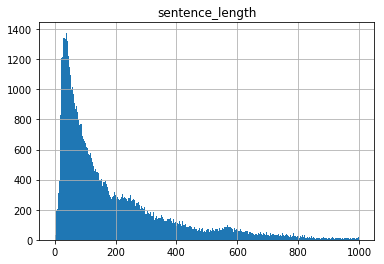

In [20]:
df['sentence_length'] = df['sentence'].map(len)

print('Total training data: {}'.format(df.shape[0]))
df.hist('sentence_length', bins=500, range=(0, 1000))
plt.show()

In [21]:
df.groupby('sentiment').describe()

sentence_length                                                     \
                    count        mean          std  min   25%    50%     75%   
sentiment                                                                      
negative          30764.0  590.922377  1374.509693  2.0  60.0  131.0  414.00   
neutral           39314.0  161.726484   145.088800  7.0  54.0  116.0  225.00   
positive          32520.0  301.683702   543.554280  1.0  59.0  163.0  375.25   

                    
               max  
sentiment           
negative   51299.0  
neutral     1807.0  
positive   17646.0

In [22]:
shuffled_index = list(range(df.shape[0]))
np.random.shuffle(shuffled_index)

In [23]:
df_shuffled = df.iloc[shuffled_index, :]

In [24]:
df.head()

,sentence,sentiment,sentence_length
0,Tên sản phẩm: Dầ...,negative,580
1,TV led sony! mới mở thì màu BT. Một lúc ...,negative,201
2,"Sữa vn chị thấy ngọt lắm , với mùi vani nên ch...",negative,122
3,Tpb dạo này pr vs làm thương hiệu ghê:)))) so ...,negative,80
4,7+ chán bán đổi qua S8+,negative,23


In [25]:
df_shuffled.head()

,sentence,sentiment,sentence_length
9167,c đôi sang sữa khac thui,negative,24
14603,Kiểm tra iPhone lock hay quốc tế trong vài nốt...,negative,221
80670,Chắc hẳn . \n Có nhiều người không tin...,positive,1457
31438,Cặp đôi đang tổng duyệt nè @Điên'n Trinh'h,neutral,42
55854,"Dàn âm thanh 5.1 LG BH5540T Chào anh, Rất tiết...",neutral,264


In [26]:
del df_shuffled['sentence_length']

In [27]:
train_ratio = 0.7
split_index = int(train_ratio*df_shuffled.shape[0])
df_shuffled.iloc[:split_index, :].to_csv(ENTROPY_DATASET + 'training_set.csv', index=False)
df_shuffled.iloc[split_index:, :].to_csv(ENTROPY_DATASET + 'test_set.csv', index=False)